<a href="https://colab.research.google.com/github/oonhy/Data/blob/main/SNU/practice_week_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

· P(X ≤ 5) = 0.393
· P(X > 5) = 0.607



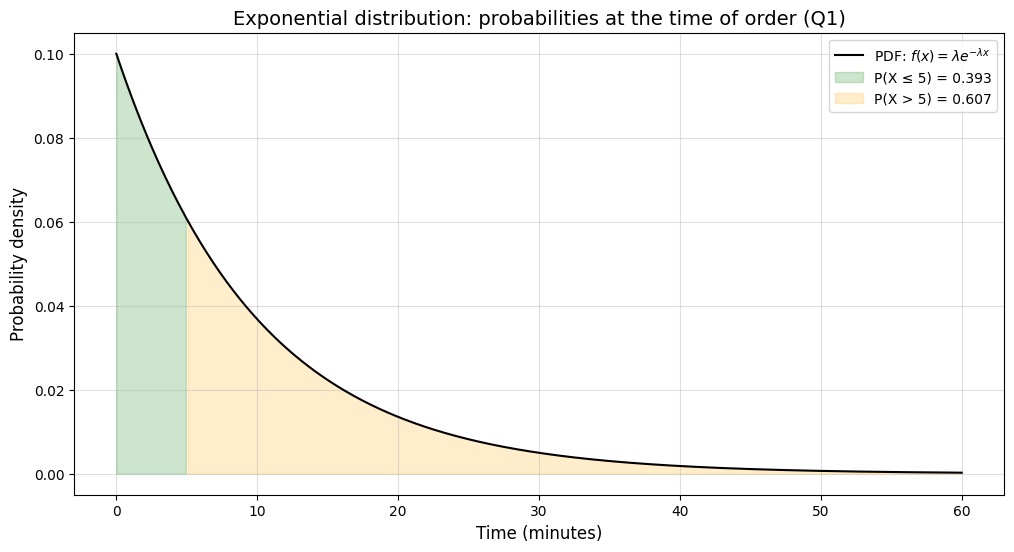

In [1]:
import numpy as np
import matplotlib.pyplot as plt

λ = 0.1
x_range = np.linspace(0, 60, 500)

pdf = λ * np.exp(-λ * x_range)
cdf = 1 - np.exp(-λ * x_range)

x = 5
prob_less_x = 1 - np.exp(-λ * x)
prob_more_x = np.exp(-λ * x)

print(f'· P(X ≤ {x}) = {prob_less_x:.3f}')
print(f'· P(X > {x}) = {prob_more_x:.3f}\n')

plt.figure(figsize=(12, 6))
plt.plot(x_range, pdf, label='PDF: $f(x) = \lambda e^{-\lambda x}$', color='black')
plt.fill_between(x_range, pdf, where=(x_range <= x), alpha=0.2, label=f'P(X ≤ {x}) = {prob_less_x:.3f}', color='green')
plt.fill_between(x_range, pdf, where=(x_range >= x), alpha=0.2, label=f'P(X > {x}) = {prob_more_x:.3f}', color='orange')
plt.title('Exponential distribution: probabilities at the time of order (Q1)', fontsize=14)
plt.xlabel('Time (minutes)', fontsize=12)
plt.ylabel('Probability density', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.4)
plt.show()

In [ ]:
from scipy.stats import gamma

theta = 10
k = 3

lower_bound = 15
upper_bound = 20

probability = gamma.cdf(upper_bound, a=k, scale=theta) - gamma.cdf(lower_bound, a=k, scale=theta)

x = np.linspace(0, 50, 500)
pdf = gamma.pdf(x, a=k, scale=theta)
plt.figure(figsize=(12, 6))
plt.plot(x, pdf, label='PDF', color='black')
plt.fill_between(x, pdf, where=(x >= lower_bound) & (x <= upper_bound), color='skyblue', alpha=0.3,
                 label=f'P({lower_bound} ≤ T ≤ {upper_bound}) = {probability:.4f}')
plt.title('Gamma distribution', fontsize=14)
plt.xlabel('Time (minutes)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.4)
plt.show()

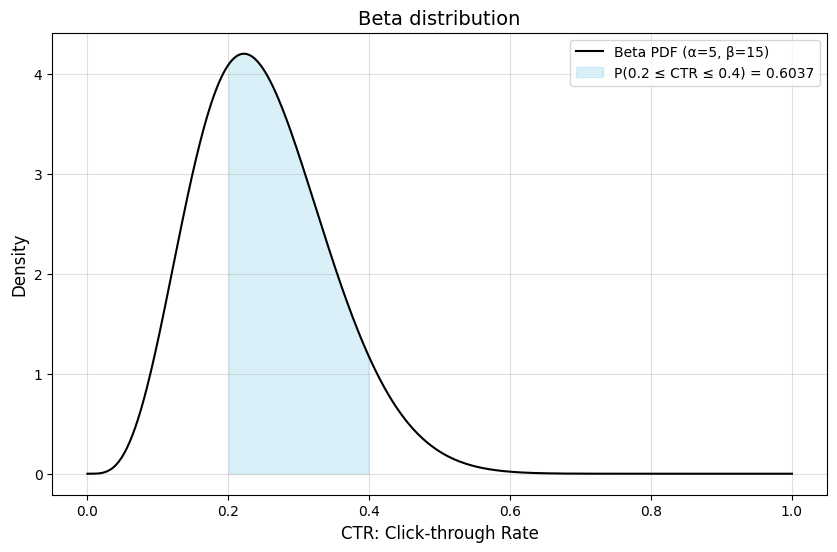

In [2]:
from scipy.stats import beta

alpha, beta_param = 5, 15

lower_bound, upper_bound = 0.2, 0.4
probability = beta.cdf(upper_bound, a=alpha, b=beta_param) - beta.cdf(lower_bound, a=alpha, b=beta_param)

x = np.linspace(0, 1, 500)
pdf = beta.pdf(x, a=alpha, b=beta_param)
plt.figure(figsize=(10, 6))
plt.plot(x, pdf, label=f'Beta PDF (α={alpha}, β={beta_param})', color='black')
plt.fill_between(x, pdf, where=((x >= lower_bound) & (x <= upper_bound)), alpha=0.3, color='skyblue',
                 label=f'P({lower_bound} ≤ CTR ≤ {upper_bound}) = {probability:.4f}')
plt.title('Beta distribution', fontsize=14)
plt.xlabel('CTR: Click-through Rate', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(fontsize=10)
plt.grid(alpha=0.4)
plt.show()

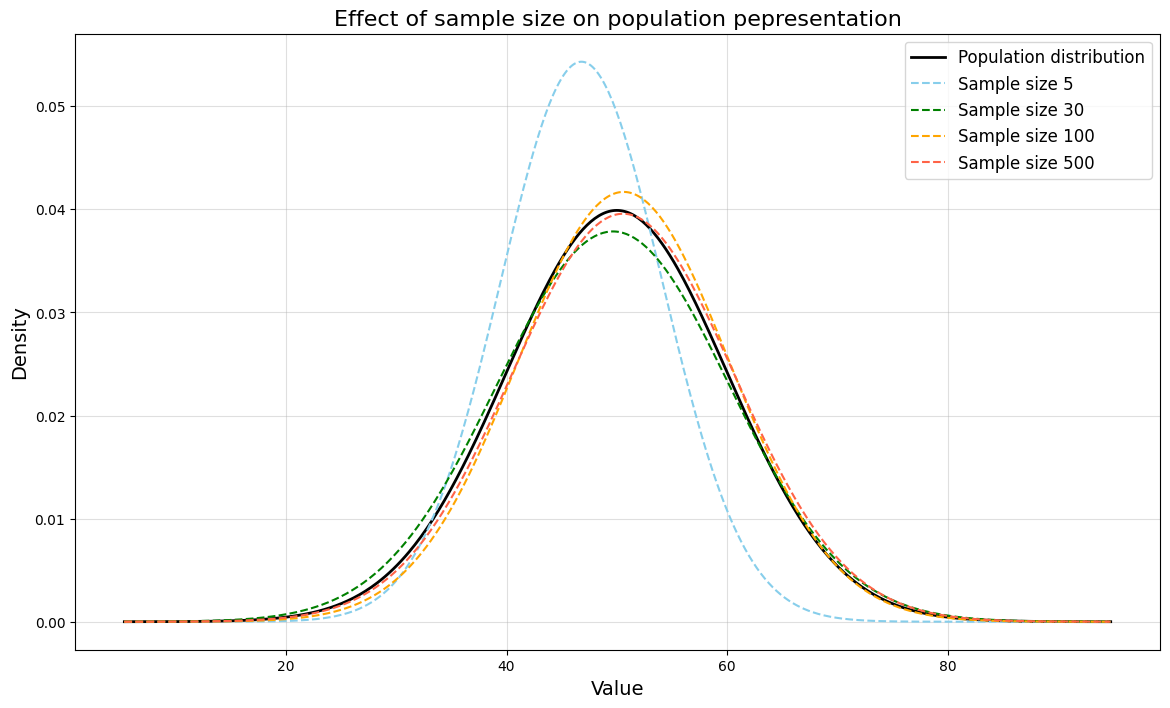

In [3]:
population_mean = 50
population_std = 10
population_size = 100000
np.random.seed(42)
population = np.random.normal(loc=population_mean, scale=population_std, size=population_size)

sample_sizes = [5, 30, 100, 500]
sample_means = []
sample_stds = []
for size in sample_sizes:
    sample = np.random.choice(population, size=size, replace=False)
    sample_means.append(np.mean(sample))
    sample_stds.append(np.std(sample, ddof=1))

plt.figure(figsize=(14, 8))
x_population = np.linspace(min(population), max(population), 500)
population_pdf = (1 / (population_std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_population - population_mean) / population_std) ** 2)
plt.plot(x_population, population_pdf, label='Population distribution', color='black', linewidth=2)

colors = ['skyblue', 'green', 'orange', 'tomato']
for i, size in enumerate(sample_sizes):
    x_sample = np.linspace(min(population), max(population), 500)
    sample_pdf = (1 / (sample_stds[i] * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x_sample - sample_means[i]) / sample_stds[i]) ** 2)
    plt.plot(x_sample, sample_pdf, label=f'Sample size {size}', color=colors[i], linestyle='--')
plt.title('Effect of sample size on population pepresentation', fontsize=16)
plt.xlabel('Value', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.4)
plt.show()

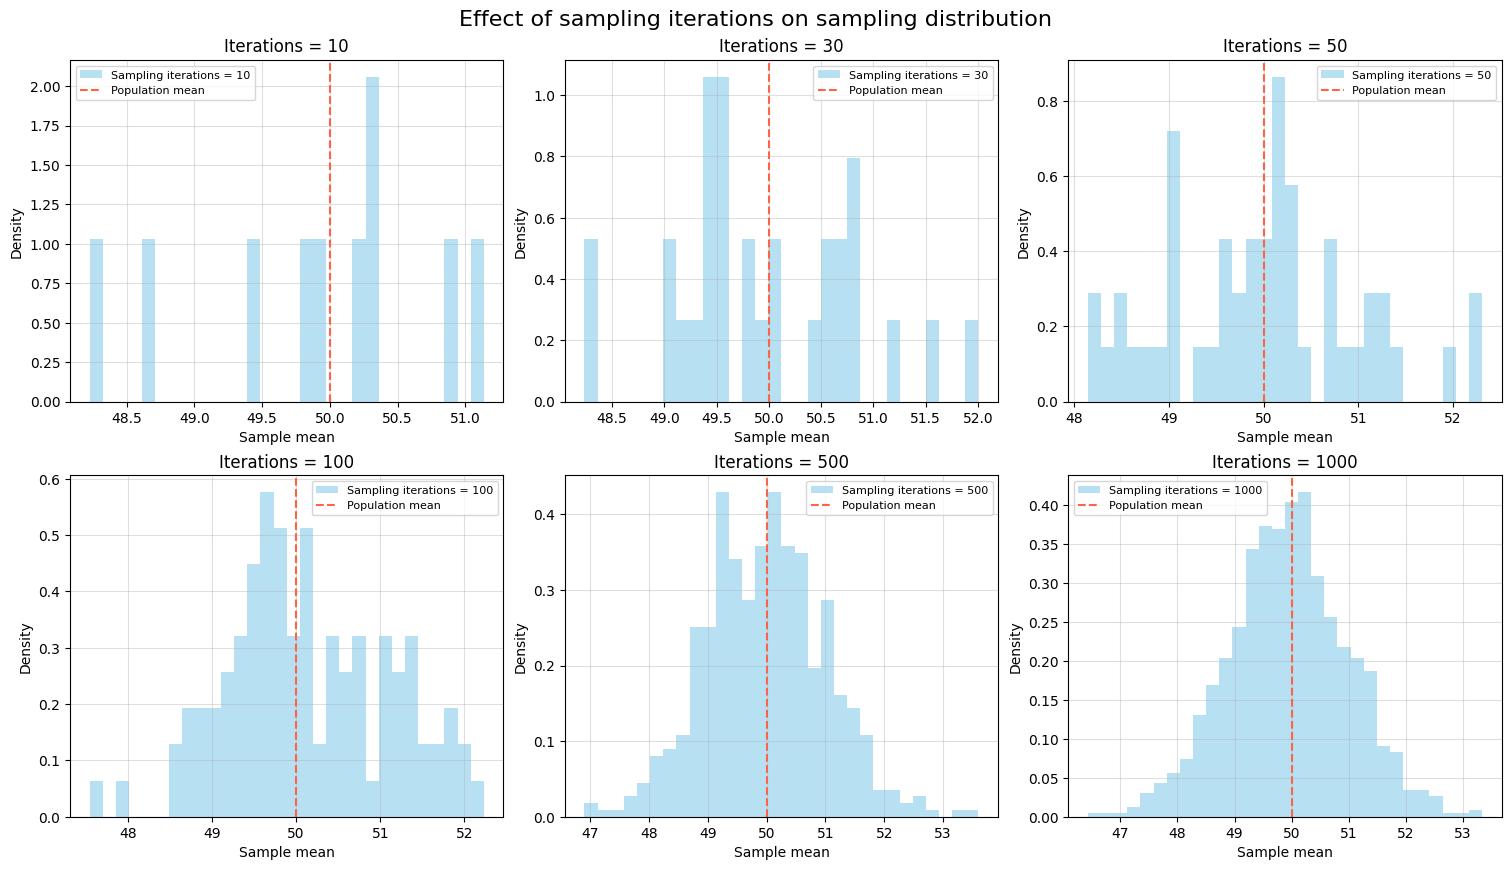

In [4]:
import pandas as pd

sample_size = 100
sampling_iterations_list = [10, 30, 50, 100, 500, 1000]

all_sample_means_by_iterations = []
for iterations in sampling_iterations_list:
    sample_means = []
    for _ in range(iterations):
        sample = np.random.choice(population, sample_size, replace=False)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)
    all_sample_means_by_iterations.append(sample_means)

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12), constrained_layout=True)
axes = axes.ravel()
for i, (iterations, ax) in enumerate(zip(sampling_iterations_list, axes)):
    ax.hist(
        all_sample_means_by_iterations[i],
        bins=30,
        alpha=0.6,
        color='skyblue',
        density=True,
        label=f'Sampling iterations = {iterations}',
    )
    ax.axvline(population_mean, color='tomato', linestyle='--', label='Population mean')
    ax.set_title(f'Iterations = {iterations}', fontsize=12)
    ax.set_xlabel('Sample mean', fontsize=10)
    ax.set_ylabel('Density', fontsize=10)
    ax.legend(fontsize=8)
    ax.grid(alpha=0.4)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])
plt.suptitle('Effect of sampling iterations on sampling distribution', fontsize=16)
plt.show()